In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_validate, StratifiedKFold

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed.cleveland.data to processed.cleveland.data


In [ ]:
df = pd.read_csv('processed.cleveland.data', names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df = df.drop( df.loc[ df['ca']=='?'].index ) 
df = df.drop( df.loc[ df['thal']=='?'].index ) 
df = df.apply( pd.to_numeric )
y = df['num']
X = df.drop(columns=['num'])
print(np.unique(y))
print(np.bincount(y))
X.describe()


[0 1 2 3 4]
[160  54  35  35  13]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
y = y.replace([2,3,4],1) # reduz o número de classes para 2
X1 = StandardScaler().fit_transform(X)
X = pd.DataFrame(X1, columns=X.columns)
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
def evaluateModel(model, X, y, printRes=True, text='', cv=False):
  if cv:
    cv_results = cross_validate(model, X, y, cv=5, scoring=('accuracy', 'roc_auc'))
    acc  = np.mean(cv_results['test_accuracy'])
    auc  = np.mean(cv_results['test_roc_auc'])
  else:
    pred = clf.predict(X)
    acc  = accuracy_score(y, pred)
    auc = roc_auc_score(y, pred)
  if printRes:
    print(text + 'acc=%.2f, auc=%.2f'%(acc,auc))
  return acc, auc

In [ ]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)
evaluateModel(clf, X_train, y_train, printRes=True, text='TRAIN - ');
evaluateModel(clf, X_vali,  y_vali,  printRes=True, text='VALID - ');
evaluateModel(clf, X, y, printRes=True, text='CV - ', cv=True);


TRAIN - acc=0.93, auc=0.92
VALID - acc=0.88, auc=0.88
CV - acc=0.83, auc=0.91


In [ ]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_vali  = clf.predict(X_vali)

evaluateModel(clf, X_train, y_train, printRes=True, text='TRAIN - ');
evaluateModel(clf, X_vali,  y_vali,  printRes=True, text='VALID - ');
evaluateModel(clf, X, y, printRes=True, text='CV - ', cv=True);

TRAIN - acc=0.86, auc=0.85
VALID - acc=0.80, auc=0.80
CV - acc=0.82, auc=0.90


In [ ]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
  clf = SVC(kernel=k)
  acc, auc = evaluateModel(clf, X, y, printRes=True, text=k+': ', cv=True)  

linear: acc=0.82, auc=0.91
poly: acc=0.83, auc=0.91
rbf: acc=0.82, auc=0.90


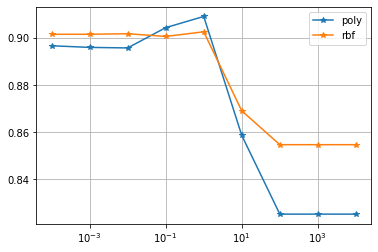

In [ ]:
kernels = ['poly', 'rbf']
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for k in kernels:
  auc_cv  = []
  for c in Cs:
    clf = SVC(kernel=k, C=c)
    #clf.fit(X_train, y_train)
    acc, auc = evaluateModel(clf, X, y, printRes=False, cv=True)
    auc_cv.append(  auc )
  plt.plot(Cs,  auc_cv, "*-", label=k)
plt.legend()
plt.xscale('log')
plt.grid()
plt.show()

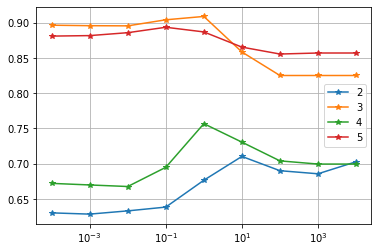

In [ ]:
# Poly
degrees = [2, 3, 4, 5]
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for d in degrees:
  auc_cv  = []
  for c in Cs:
    clf = SVC(kernel='poly', degree=d, C=c)
    clf.fit(X_train, y_train)
    acc, auc = evaluateModel(clf, X, y, printRes=False, cv=True)
    auc_cv.append(  auc )
  plt.plot(Cs,  auc_cv, "*-", label=d)
plt.legend()
plt.xscale('log')
plt.grid()
plt.show()

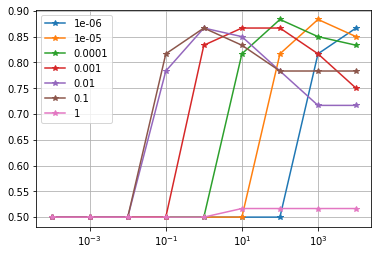

In [ ]:
# RBF
gammas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for g in gammas:
  auc_cv  = []
  for c in Cs:
    clf = SVC(kernel='rbf', gamma=g, C=c)
    clf.fit(X_train, y_train)
    acc, auc = evaluateModel(clf, X_vali, y_vali, printRes=False); # cv=True
    auc_cv.append(  auc )
  plt.plot(Cs,  auc_cv, "*-", label=g)
plt.legend()
plt.xscale('log')
plt.grid()
plt.show()

# Multiclass

In [ ]:
df = pd.read_csv('processed.cleveland.data', names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df = df.drop( df.loc[ df['ca']=='?'].index ) 
df = df.drop( df.loc[ df['thal']=='?'].index ) 
df = df.apply( pd.to_numeric )
y = df['num']
X = df.drop(columns=['num'])
print(np.unique(y))
print(np.bincount(y))
X.describe()

[0 1 2 3 4]
[160  54  35  35  13]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
def evaluateModelM(model, X, y, printRes=True, text='', cv=False):
  pred = clf.predict(X)
  if cv:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    cv_results = cross_validate(model, X, y, cv=skf, scoring=('accuracy'))
    acc  = np.mean(cv_results['test_score'])
  else:
    acc  = accuracy_score(y, pred)
  if printRes:
    print(text + 'acc=%.2f'%(acc))
  return acc

In [ ]:
X1 = StandardScaler().fit_transform(X)
X = pd.DataFrame(X1, columns=X.columns)
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.20, random_state=1)

print(np.bincount(y)/len(y))
print(np.bincount(y_train)/len(y_train))

clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_train, y_train)

evaluateModelM(clf, X_train, y_train, printRes=True, text='TRAIN - ');
evaluateModelM(clf, X_vali,  y_vali,  printRes=True, text='VALID - ');
evaluateModelM(clf, X, y, printRes=True, text='TRAIN cv - ', cv=True);

[0.53872054 0.18181818 0.11784512 0.11784512 0.04377104]
[0.54852321 0.18565401 0.10126582 0.11392405 0.05063291]
TRAIN - acc=0.77
VALID - acc=0.58
TRAIN cv - acc=0.59


In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

evaluateModelM(clf, X_train, y_train, printRes=True, text='TRAIN - ');
evaluateModelM(clf, X_vali,  y_vali,  printRes=True, text='VALID - ');
evaluateModelM(clf, X, y, printRes=True, text='TRAIN cv - ', cv=True);

TRAIN - acc=0.70
VALID - acc=0.52
TRAIN cv - acc=0.58


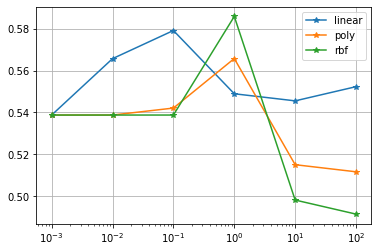

In [ ]:
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.20, random_state=1)

kernels = ['linear', 'poly', 'rbf']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
for k in kernels:
  auc_cv  = []
  for c in Cs:
    clf = SVC(kernel=k, C=c)
    clf.fit(X_train, y_train)
    acc = evaluateModelM(clf, X, y, printRes=False, cv=True)
    auc_cv.append(  acc )
  plt.plot(Cs,  auc_cv, "*-", label=k)
plt.legend()
plt.xscale('log')
plt.grid()
plt.show()